# Homework #8

**See Canvas for the HW #8 assignment and due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the [class scanning policy](https://docs.google.com/document/d/17y5ksolrn2rEuXYBv_3HeZhkPbYwt48UojNT1OvcB_w/edit?usp=sharing). Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 

## A. Theoretical Problems

## NOPE!


## B. Computational Problems

## B.1 Do remote students perform worse?

In spring 2019, STAT 5010 had two sections: an in-person section and an online/remote section. The Department of Applied Math is interested to know whether the in-person students performed better than the remote students. For this question, let $\alpha = 0.05$. 

Each row of the dataset is a student from STAT 5010 in 2019. The variables in the dataset are:

- `modality`: `1` denotes in-person, `2` denotes remote.
- `score`: The final score in the class.

In [ ]:
library(tidyverse)
library(ggplot2)


df = read.csv(url(paste0("https://raw.githubusercontent.com/bzaharatos/STAT-5000/main/data/InPersonRemote.txt")), sep="\t")
df$modality = as.factor(df$modality)
summary(df)
dim(df)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



     score       modality
 Min.   :74.64   1:13    
 1st Qu.:79.15   2:19    
 Median :80.69           
 Mean   :80.99           
 3rd Qu.:82.04           
 Max.   :87.84           

[1] 32  2

**B.1 (a) [10 points] Explore the data to decide whether the normality and equal variance assumptions might be violated.**

If you do not have evidence that the data are non-normal, you can carry on as if the data are normal. If you're not sure whether the variances are equal, assume they aren't.

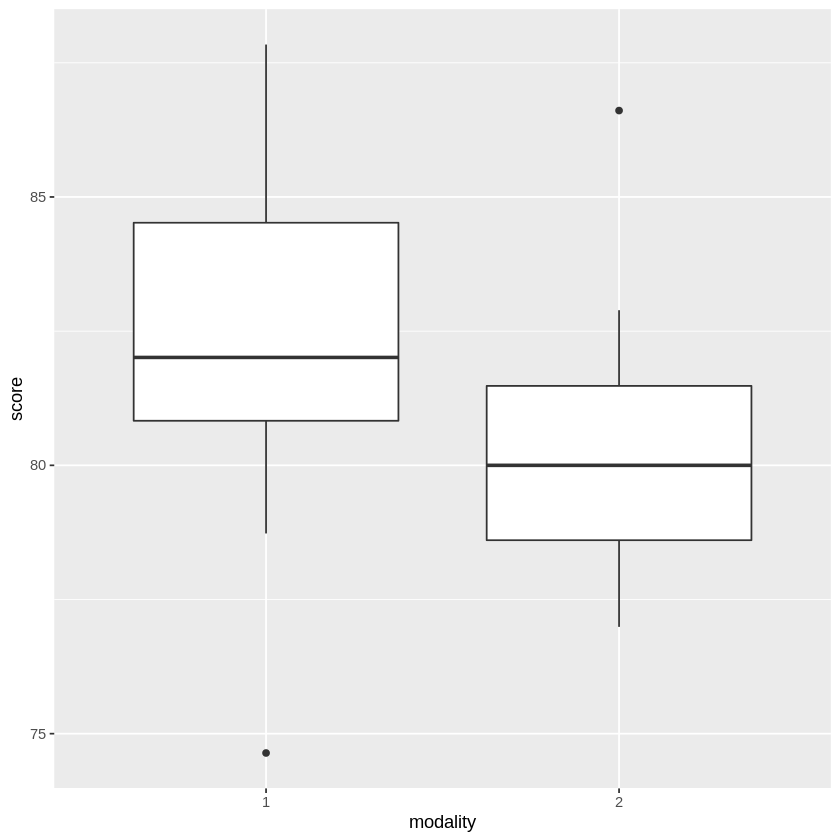


	Shapiro-Wilk normality test

data:  x
W = 0.954, p-value = 0.6599



	Shapiro-Wilk normality test

data:  y
W = 0.91808, p-value = 0.1043


The sample variance of the scores of the in-person section is 11.24063. The sample variance of the scores of the remote section is 5.111162

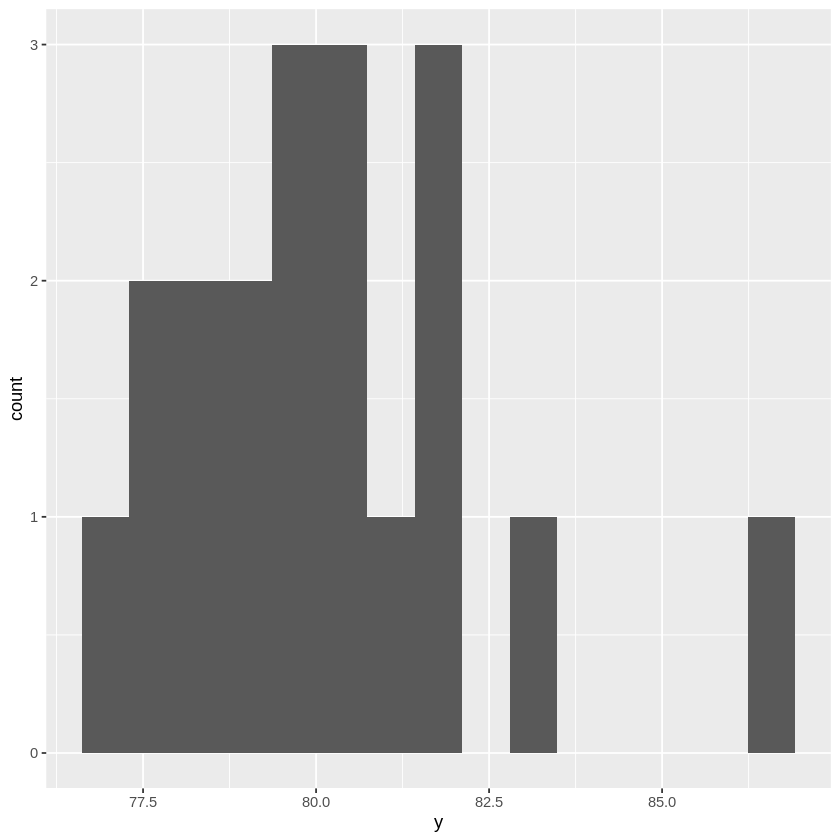

In [ ]:
ggplot(df) + 
    geom_boxplot(aes(x = modality, y = score))


x = df$score[df$modality == 1]; xbar = mean(x); n1 = length(x)
y = df$score[df$modality == 2]; ybar = mean(y); n2 = length(y)

ggplot(data.frame(y)) + 
    geom_histogram(aes(x = y), bins = 15)

shapiro.test(x)
shapiro.test(y)

cat("The sample variance of the scores of the in-person section is", var(x));
cat(". The sample variance of the scores of the remote section is", var(y));

We do not have evidence that the original score data come from a *non-normal* population. So, we conduct our test as if they came from a normal  distribution.

It does appear as though the  variances are different (at least in the sample).

Let $\mu_R$ represent the population mean of scores in the **r**emore group. Let $\mu_P$ represent the population mean of scores in the in-**p**erson group. 

**B.1 (b) [10 points] Test whether there is statistical evidence that $\mu_R \ne \mu_P$ at the $\alpha = 0.05$ level. Use the appropriate test, based on the results from B.1(a). Code the test yourself (without using a built-in R function). Be sure to write out your null and alternative hypotheses and clearly state your decision.**

We'll assume that no other variables would be relevant to any difference in scores (but that's probably not true, and we learn how to deal with this kind of situation in STAT 5010!).

In [ ]:
x = df$score[df$modality == 1]; xbar = mean(x); n1 = length(x)
y = df$score[df$modality == 2]; ybar = mean(y); n2 = length(y)

#Welch
t_w = (xbar-ybar)/sqrt((var(x)/n1 + var(y)/n2));
v = (var(x)/n1 + var(y)/n2)^2/((var(x)/n1)^2/(n1-1) +  (var(y)/n2)^2/(n2-1)); 
p_w = 2*(1 - pt(abs(t_w), v)); 
cat("The Welch test t statistic is ", t_w, ". The p-value is ", p_w)

#pooled, variance assumed equal
sp2 = ((n1-1)*var(x) + (n2-1)*var(y))/(n1+n2-2)
t_t = (xbar-ybar)/sqrt(sp2*(1/n1 + 1/n2)); 
p_t = 2*(1 - pt(abs(t_t), n1+n2-2)); 

cat(". The pooled t statistic is ", t_t, ". The p-value is ", p_t)




The Welch test t statistic is  1.849684 . The p-value is  0.07967117. The pooled t statistic is  1.989615 . The p-value is  0.05581705

**B.1 (c) [10 points] Now find an R function that conducts the test that you used in B.1(b). Interpret the confidence interval given by that function.**

In [ ]:
t.test(x,y, alternative = "two.sided")
t.test(x,y, var.equal = TRUE, alternative = "two.sided")


	Welch Two Sample t-test

data:  x and y
t = 1.8497, df = 19.378, p-value = 0.07967
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2561572  4.1950236
sample estimates:
mean of x mean of y 
 82.16154  80.19211 



	Two Sample t-test

data:  x and y
t = 1.9896, df = 30, p-value = 0.05582
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05212288  3.99098928
sample estimates:
mean of x mean of y 
 82.16154  80.19211 


$(-0.256, 4.195)$ is a range of plausible values for $\mu_R - \mu_P$. Since this confidence interval covers zero, we do not have evidence at the $\alpha = 0.05$ level that the difference is other than zero.

## B.2 Parametric tests without normality
Let $X ∼ Pois(\lambda)$. We want to test the null hypothesis that $\lambda \leq 15$, and the alternative hypothesis is that $\lambda > 15$. Our sample size for this test is equal to 1.  We will reject the null hypothesis if $X$ is greater than a certain value $c$.

**B.2 (a) [18 points] What value should we choose for $c$ such that the probability of a type I error is at most $0.10$? In the first cell, write out the relevant formulas. In the second (code cell), construct a table of values for $c$ along with the corresponding type I errors. In the third, state $c$.**

We want to ensure that

$$Pr\left(x > c  \ ;  \lambda \leq 15\right) \leq 0.1$$

That is, we seek the minimum $c$ such that

$$\sum_{i=0}^{c} 15^k e^{-15} / k! \geq 0.9$$

We perform some calculations:

In [ ]:
N=25
p0 = sum(15^(0:14) * exp(-15) / factorial(0:14))
Pr = cumsum(c(p0, 15^(15:N) * exp(-15) / factorial(15:N)))
options(digits = 3)
cbind.data.frame(c = 14:N, "Pr(λ ≤ 15 ; x = c)" = 1 - Pr, "Pr(Type I Error) ≤ .1" = Pr>=.9)


#simulation
results <- replicate(1e4, {
    x <- rpois(1,15)
    c("c = 19" = x > 19, "c = 20" = x > 20)
})

"Type I error rate assuming c:"
rowMeans(results)

c,Pr(λ ≤ 15 ; x = c),Pr(Type I Error) ≤ .1
<int>,<dbl>,<lgl>
14,0.53435,FALSE
15,0.43191,FALSE
16,0.33588,FALSE
17,0.25114,FALSE
18,0.18053,FALSE
19,0.12478,FALSE
20,0.08297,TRUE
21,0.05311,TRUE
22,0.03274,TRUE


[1] "Type I error rate assuming c:"

c = 19 c = 20 
0.1257 0.0848

Thus, the type one error rate will be acceptable if we reject the null only if $x > c = 20$. We can verify this by simulation (see above).

**B.2 (b) [6 points] If $\lambda$ is actually equal to $20$, what is the probability of making a type 2 error using the cut-off point from B.2 (a)? In the first cell, write the appropriate formula. In the second, calculate it using R.**

The probability of making a type II error is $P(X \le 20 \, ; \, \lambda = 20)$:

In [1]:
### I think it should be less than or equal to 19, not 20:

ppois(19,20)
ppois(20,20)


[1] 0.4702573

[1] 0.5590926

## B.3 Severely tested claims?

Let $X$ be the number of heads in $n = 60$ tosses of a coin. Denote the probability of heads as $p$. In this example, we will explore properties of a test of whether the coin is biased toward heads. 

**B.3(a) [7 points] Explicitly write out the null and alternative hypotheses. Let the parameter space be all $p \in (0,1)$.**

$ H_{0}: p\le0.5 $

$ H_{1}: p>0.5 $

**B.3(b) [5 points] Define the rejection region to be  $X \ge 37$.  Calculate the rate of type I error. (For this part, and all remaining parts, calculate probabilities exactly, i.e., without using the normal approximation).**

In [ ]:
n=60; p=0.5; c = 37; 
#rate of type 1 error
alpha = 1 - pbinom(c,n,p) + dbinom(c,n,p)

# alpha

1-pbinom(c,n,p)
dbinom(c,n,p)

1-pbinom(36,n,p)


[1] 0.02594695

[1] 0.02028354

[1] 0.04623049

**B.3(c) [10 points] Construct a grid of values for $p$ under the alternative hypothesis. For each value of $p$ in this grid, calculate the power of this test (remember that statistical power is the probability of rejecting the null hypothesis while an alternative hypothesis is true). Make a plot of the power ($y$-axis) vs $p$ ($x$-axis). Interpret/comment on this plot. In particular, as $p$ gets further from the $p$ specified under the null hypothesis, what happens to the power?**


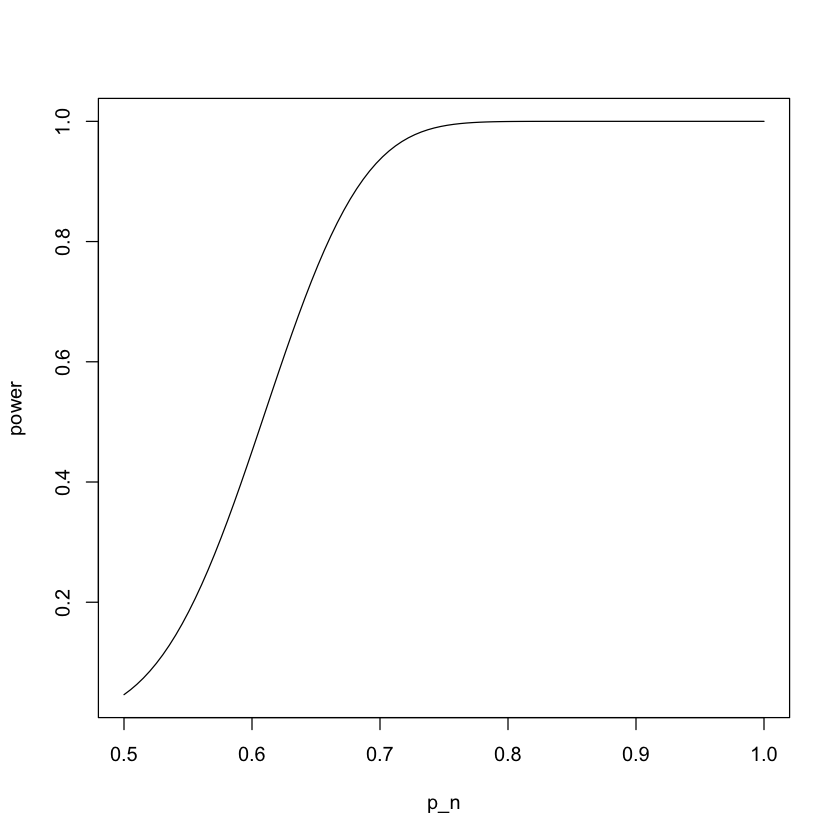

In [ ]:
#sequence of coins with increasing bias towards heads
p_n = seq(0.5,1, length.out = 100)
#calculate power and plot power vs p
power = 1 - pbinom(c,n,p_n) + dbinom(c,n,p_n)
plot(p_n,power, type = "l")

From the plot, it is clear that as $p$ gets further from the $p$ specified under the null hypothesis of $p=0.5$, the power increases.  Power represents the probability that we reject the null when the null is false.  This means that we will reject the null hypothesis that the coin is fair more often when the coin is more biased towards heads.

**B.3(d) [6 points] Suppose that you flip the coin and get $27$ heads out of $60$. Use this information to test your hypotheses from part B.3(a). State your conclusion.**


In [ ]:
x = 27; pvalue = 1-pbinom(x,n,p) + dbinom(x,n,p); pvalue

[1] 0.816853

We fail to reject the null if $p>\alpha=0.046$ and reject the null if $p<\alpha$.

At this point, we've failed to reject $H_0$. But do we have evidence that the coin is fair, or close to fair? Typical "classical" frequentist inference stops with p-values calculated on tests with reasonable error properties (e.g., low type I error and high power). But philosopher Deborah Mayo developed an extension to hypothesis testing, called *severity*, that claims to, among other things, help justify claims about "accepting" $H_0$. 

Instead of merely concluding that we have no evidence that $p>0.5$", we can use the observed result `x` to assess specific inferences about $H_0$.
 
Severity is meant to answer the question *what is the probability of a worse fit with a claim $C$ if $C$ were false?* We can think of severity as a function of three items: a test $T$ (e.g., a specified statistical model, null, and alternative hypotheses), an outcome $O$ (e.g., an $\bar{x}$, $\widehat p$), and a claim $C$, (e.g., $p < 0.5$). 

- For this test, a "worse fit" would mean that the observed $x$ would be such that $x/n$ is further from the claim $C$. So, for the claim $C: p < 0.5$, a worse fit would be anything greater than $x = 27$.

- "If $C$ were false" means that we evaluate the relevant probability under the complement of $C$. We choose the value of $p$ that is the smallest pertubation to make $C$ false. So, for the claim $C: p < 0.5$, we would use $p = 0.5$ to make $C$ false.

According to Mayo, severity can be thought of as a measure of how severely tested a claim is. In particular, if $H_0$ has a high severity value, then $H_0$ is severely tested, and has some corroboration.

**B.3(e) [11 points] Compute the severity of $C: p < 0.5$? Is $H_0$ severely tested?**

In [ ]:
# 1-pbinom(x,n,0.5)

1-pbinom(27,60,0.5)
pbinom(27,60,0.5)

[1] 0.740521

[1] 0.259479

Yes, $H_0$ appears to be relatively severely tested, with a severity of $0.74$.

**B.3 (f) Compute the severity for all values of $p$ between $0$ and $0.5$. Comment on the shape of the curve.**

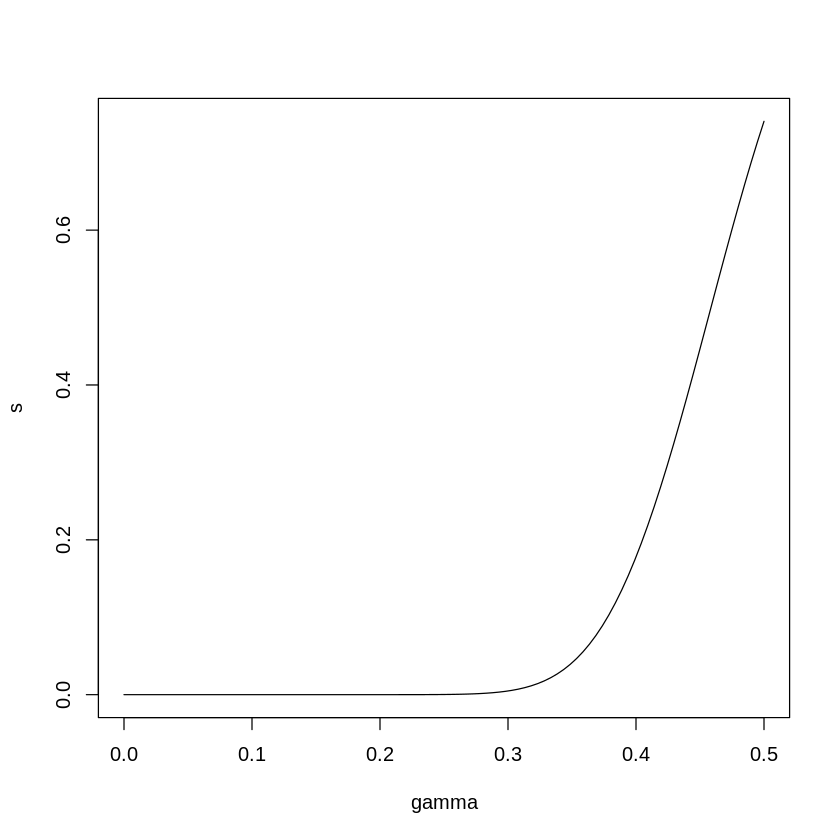

In [ ]:
gamma = seq(0,0.5, length.out = 100)
s = 1-pbinom(x,n,gamma)
plot(gamma,s, type = "l")

Large deviations from the endpoint of the null ($0.5$) are less severely tested. This makes some sense, since large deviations from $0.5$ are further from the calculated statistic ($27/60$).

**B.3 (g) [5 points] Now compute the severity for $H_1: p > 0.5$, using the same $x = 27$ as above. Note that "a worse fit" and "$C$ is false" will have different interpretations. Plot the severity against $(0.5, 1)$.**

[1] 0.183

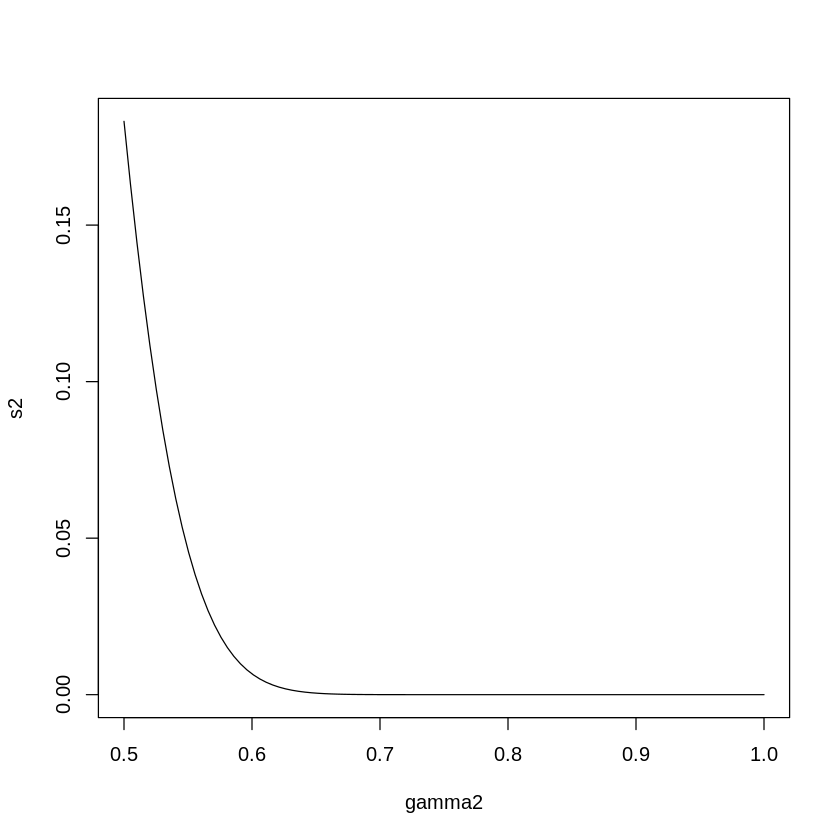

In [ ]:
gamma2 = seq(0.5,1, length.out = 100); 
pbinom(x,n,0.5) - dbinom(x,n,0.5);  #for gamma = 0
s2 = pbinom(x,n,gamma2) - dbinom(x,n,gamma2)
plot(gamma2,s2, type = "l")

Let $\gamma$ be the discrepancy from the null hypothesis (e.g., so in this problem, $\gamma = 0.1$ corresponds to $p = 0.6$). One unfortunate consequence of hypothesis testing is the [paradox of large samples](https://www.jstor.org/stable/24093874?seq=1#metadata_info_tab_contents): the larger the sample size, $n$, the smaller the $\gamma$ necessary for rejecting $H_0$. In the extreme, that means that very large samples will reject the null hypothesis when $\gamma$ is very close to zero. But some argue that that should be evidence *for* the null.

Severity is thought to help solve this problem; it would help solve the problem if for a fixed observation (e.g., $\widehat p$), for larger samples, small deviations from the null hypothesis were tested less severely.

**B.3 (g) [7 points] Now, let $x = 180$ and $n = 400$ (up from $60$ above). So, $\widehat p$ is the same, but the sample size is bigger. Show that the severity curve decays more steeply, giving lower severity to small values of $\gamma$ when compared to the smaller sample. Describe how these plots help solve the paradox of large samples.**

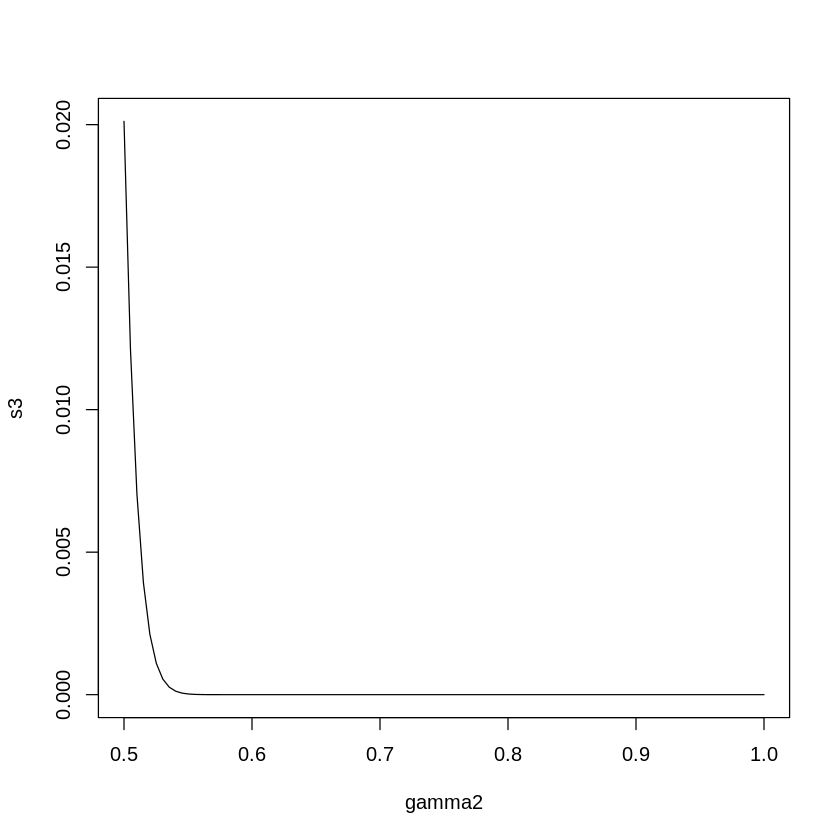

In [ ]:
x2 = 180; n = 400
s3 = pbinom(x2,n,gamma2) - dbinom(x2,n,gamma2)
plot(gamma2,s3, type = "l")

Here, we see that severity decays more quickly. So for a fixed $\gamma$, the larger sample tests $C$ less severely.